## 행렬곱으로 이해하는 신경망
- 순전파(Forward Propagation): 인공 신경망에서 입력층에서 출력층 방향으로 연산을 진행
    - 주어진 입력이 입력층으로 들어가서 은닉층을 지나 출력층에서 예측값을 얻는 과정을 순전파

### 순전파(Foward Propagation)
- 활성화 함수, 은닉층의 수, 각 은닉층의 뉴런 수 등 딥 러닝 모델을 설계
- 입력값은 입력층, 은닉층을 지나면서 각 층에서의 가중치와 함께 연산되며 출력층으로 향함
- 출력층에서 모든 연산을 마친 예측값이 나옴
- 순전파=입력층에서 출력층 방향으로 예측값의 연산이 진행되는 과정 <br>
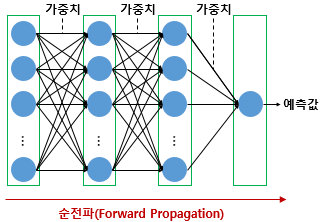

### 행렬곱으로 순전파 이해하기
- 입력의 차원이 3, 출력의 차원이 2인 위 인공 신경망을 구현 코드
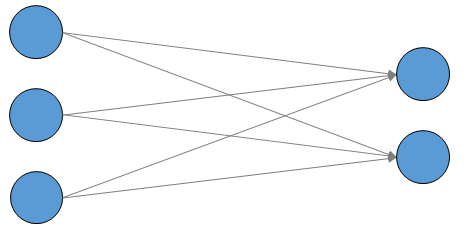

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 3개의 입력과 2개의 출력
model.add(Dense(2, input_dim=3, activation='softmax'))
## 활성화 함수는 소프트맥스 함수를 임의로 기재
## 소프트맥스 회귀로도 이진 분류는 수행 가능함

- .summary(): 모델에 존재하는 모든 매개변수(가중치 w와 편향 b의 개수)를 확인가능
    - Par=매개변수
    - 매개변수의 수가 8개라고 나옴
    - 학습가능한 매개변수인 w와 b의 개수가 총 합해서 8개라는 이미

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


- 행렬의 곱셈 관점
    - 위 모델은 입력의 차원이 3, 출력의 차원이 2
        - 신경망의 용어로서 표현한다면, 입력층의 뉴런이 3개, 출력층의 뉴런이 2개
        - 그림에서 화살표 각각은 가중치w를 의미, 6개의 화살표= 가중치w의 개수가 6개
    - 행렬곱의 관점
        - 3차원 벡터에서 2차원 벡터가 되기 위해서 3 × 2 행렬을 곱
        - 각각의 원소가 각각의 w가 됨
        - y1에 연결되는 화살표 w1, w2, w3를 주황색으로 표현, y2에 연결되는 화살표 w4, w5, w6를 초록색으로 표현
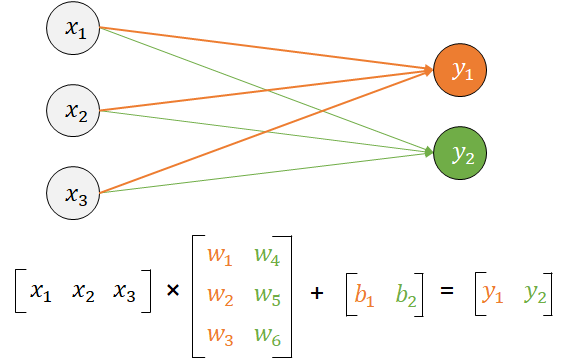

- 편향
    - 그림에서 편향b는 편의상 생략, but 인공신경망 내부적으로는 편향b의 연산 또한 존재
    - 행렬 연산식 b1, b2가 편향b에 해당
    - 편향b의 개수는 항상 출력의 차원을 기준으로 개수를 확인하면 됨
    - 출력의 차원이 2인 경우, 편향도 2개 (b1, b2)
- 학습 가능한 매개변수
    - 가중치w의 개수 총 6개, 편향b의 개수 2개 -> 총 8개
- 식 표현
    - h1=x1w1+x2w2+x3w3+b1
    - h2=x1w4+x2w5+x3w6+b2
    - [y1, y2]=softmax([h1,h2]) 
    - 입력 x1, x2, x3을 벡터X로 명명 <br>
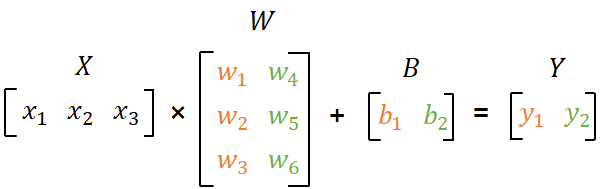

### 행렬곱으로 병렬 연산 이해하기
- 행렬곱을 사용하면 병렬 연산도 가능
- 위의 예시(그림)의 경우 1개의 샘플만 처리한 경우
- 4개의 샘플을 동시에 처리한다면 아래와 같음
    - 4개의 샘플을 동시에 처리하고 있지만, 매개변수는 여전히 8개
    - 배치 연산: 인공 신경망이 다수의 샘플을 동시에 처리하는 것 <br>
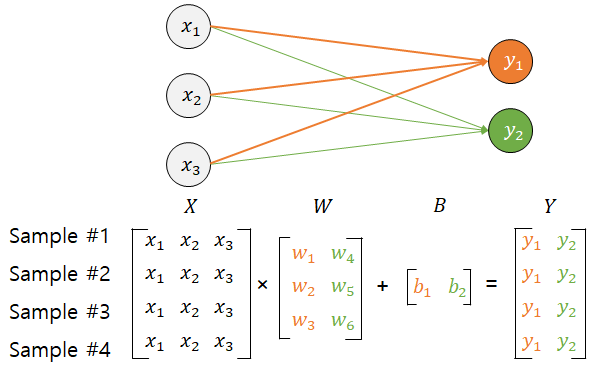   

### 행렬곱으로 다층 퍼셉트론의 순전파 이해하기
#### 코드로 구현
- () 괄호 안의 값은 각 층에서의 뉴런의 수를 의미
- 입력층부터 출력층까지 순차적으로 인공 신경망의 층을 한 층씩 추가

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, activation='relu'))

# 이어서 8개의 출력
model.add(Dense(8, activation='relu'))

# 이어서 3개의 출력
model.add(Dense(3, activation='softmax'))

#### 행렬의 크기 추정
- 위 내용을 정리하자면
    - 입력층 : 4개의 입력과 8개의 출력
    - 은닉층1 : 8개의 입력과 8개의 출력
    - 은닉층2 : 8개의 입력과 3개의 출력
    - 출력층 : 3개의 입력과 3개의 출력
    - 배치크기는 1을 가정
- 입력층 -> 은닉층 1
    - 입력행렬 X의 크기: 1 × 4
    - layer1의 출력은 8개 -> 출력행렬 Y의 크기: 1 × 8 <br>
    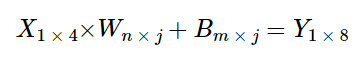 <br>
    - 가중치 행렬W의 행은 입력행렬 X의 열과 같아야 하기 때문에 (n=4)
    - 편향행렬 B는 출력행렬 Y의 크기에 영향을 주지 않기 때문에, 편향 행렬 B의 크기는 출력 행렬 Y의 크기와 같음 (m=1, j=8)
    - 가중치 행렬W의 열은 출력행렬 Y의 열과 동일해야함 (j=8)
- 이와 같이 추정을 할 수 있음

- 이와 같이 순전파 진행, 예측값 구함
- 그 다음, 인공 신경망이 해야할 일은 예측값과 실제값으로부터 오차를 계산
- 오차로부터 가중치와 편향을 업데이트 (=학습 단계)
    - 업데이트시, 인공신경망은 순전파와 반대 방향으로 연산을 진행하며 가중치를 업데이트
    - 이 과정은 역전파(BackPropagation)라고 함